In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 16 - Wine Quality Predictor - Classification Approach - Copy\winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


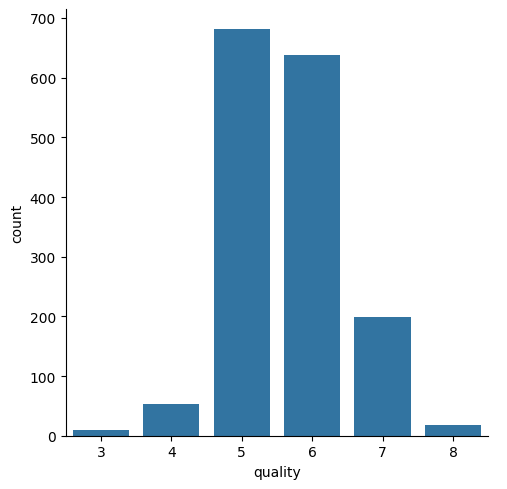

In [6]:
sns.catplot(x = 'quality', data = df, kind = 'count')

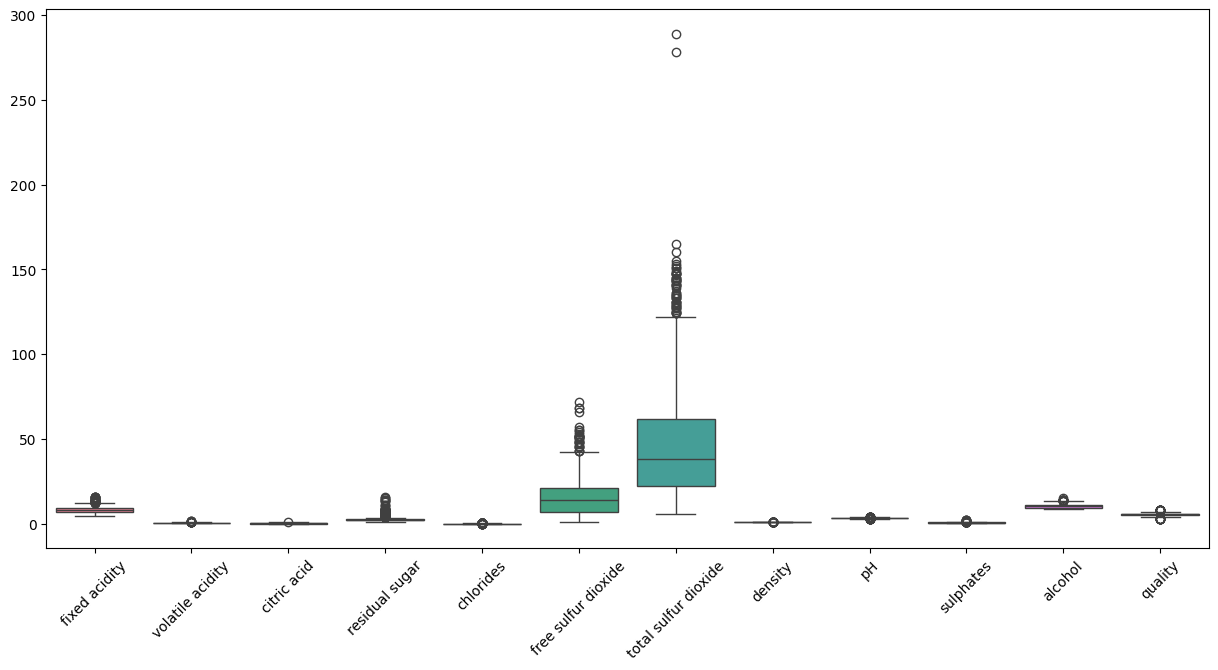

In [7]:
df['quality'].value_counts()
plt.figure(figsize= (15,7))
sns.boxplot(data = df)
plt.xticks(rotation = 45)
plt.show()


In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

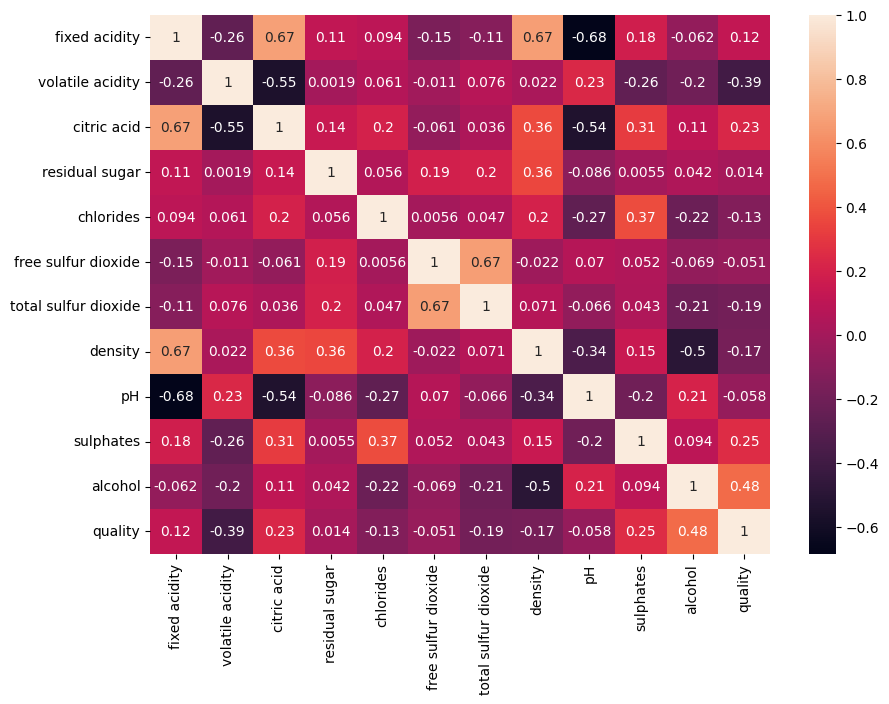

In [9]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True)

In [10]:
print("pH range:", df['pH'].min(), "to", df['pH'].max())  # Should be ~2.5-4.5 for wine
print("Alcohol range:", df['alcohol'].min(), "to", df['alcohol'].max())  # Should be ~8-15%

pH range: 2.74 to 4.01
Alcohol range: 8.4 to 14.9


In [11]:
# Drop total sulfur dioxide as it has lower relationship with quality than free sulfur dioxide

X = df.drop(columns = 'quality')
y = df.quality.apply(lambda y : 1 if y >= 7 else 0)

In [12]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2, stratify= y)

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:

models = {
    'Logistic Regression': {
        'model' : LogisticRegression(random_state= 2 ),
        'params':{
            'C':[0.1, 1, 10],
            'penalty' : ['l2'],
            'class_weight': ['balanced']
        }
    },
    'SVM':{
        'model' : SVC(random_state= 2),
        'params':{
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'class_weight': ['balanced']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state= 2),
        'params': {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [10, 20, 50, 100],
            'min_samples_leaf': [1, 2, 5, 10],
            'max_features': ['sqrt', 'log2', None],
            'n_estimators': [50, 100, 200]
        }
    },
    'XGBoost':{
        'model': xgb.XGBClassifier(scale_pos_weight=6.37, random_state=42),
        'params':{
            'max_depth': [4,5,6],           
            'learning_rate': [0.1, 0.15],  
            'min_child_weight': [3, 5],    
            'subsample': [0.8, 0.9],       
            'colsample_bytree': [0.8, 0.9], 
            'n_estimators': [50, 100] 
        }
    }
}

In [19]:
results = {}

for name, config in models.items():
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv = 5,
        scoring = 'f1',
        n_jobs = -1
    )

    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_

    train_pred = best_model.predict(X_train_scaled)
    test_pred = best_model.predict(X_test_scaled)

    results[name] = {
        'best_params': grid_search.best_estimator_,
        'train_accuracy': accuracy_score(y_train, train_pred),
        'test_accuracy': accuracy_score(y_test, test_pred),
        'train_f1': f1_score(y_train, train_pred),
        'test_f1':f1_score(y_test, test_pred),
        'precision': precision_score(y_test, test_pred),
        'recall': recall_score(y_test, test_pred)
    }



In [17]:
summary_data = []
for name, result in results.items():
    summary_data.append({
        'Model': name,
        'Train Accuracy': result['train_accuracy'],
        'Test Accuracy': result['test_accuracy'],
        'Test F1': result['test_f1'],
        'Precision': result['precision'],
        'Recall': result['recall']
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.round(4)
print(summary_df.to_string(index=False))

              Model  Train Accuracy  Test Accuracy  Test F1  Precision  Recall
Logistic Regression          0.7897         0.7812   0.5205     0.3689  0.8837
                SVM          0.9101         0.8656   0.6325     0.5000  0.8605
      Random Forest          0.9773         0.9094   0.6133     0.7188  0.5349
            XGBoost          0.9468         0.8812   0.6724     0.5342  0.9070


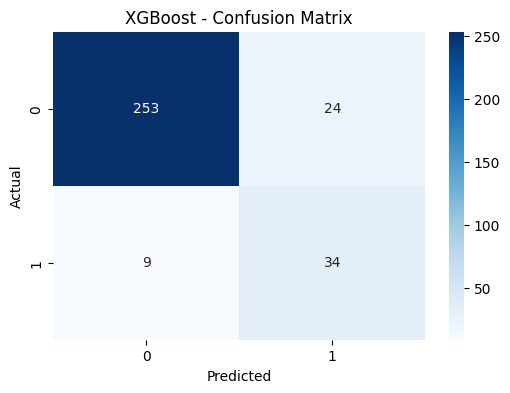

In [22]:
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'{name} - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
if hasattr(best_model, 'feature_importances_'):
    importances = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
        
print(f"\nTop 5 Important Features for {name}:")
print(importances.head().to_string(index=False))


Top 5 Important Features for XGBoost:
             feature  importance
             alcohol    0.277785
           sulphates    0.102552
    volatile acidity    0.088910
         citric acid    0.086557
total sulfur dioxide    0.077576


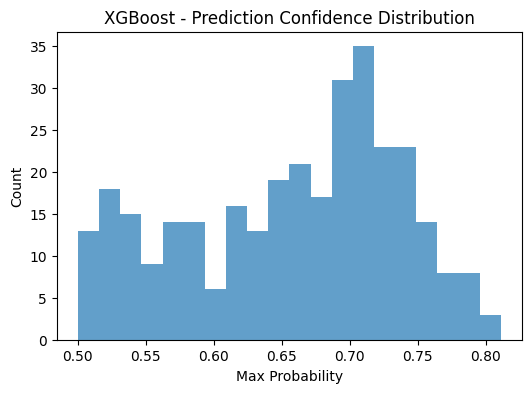

In [24]:
if hasattr(best_model, 'predict_proba'):
    probabilities = best_model.predict_proba(X_test)
    confidence = probabilities.max(axis=1)
        
    plt.figure(figsize=(6, 4))
    plt.hist(confidence, bins=20, alpha=0.7)
    plt.title(f'{name} - Prediction Confidence Distribution')
    plt.xlabel('Max Probability')
    plt.ylabel('Count')
    plt.show()
        
    results[name]['avg_confidence'] = confidence.mean()

In [26]:
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='f1')
results[name]['cv_f1_mean'] = cv_scores.mean()
results[name]['cv_f1_std'] = cv_scores.std()

print(f"Test F1: {results[name]['test_f1']:.4f}")
print(f"CV F1: {results[name]['cv_f1_mean']:.4f} ± {results[name]['cv_f1_std']:.4f}")
print(f"Classification Report:")
print(classification_report(y_test, test_pred))


Test F1: 0.6733
CV F1: 0.6130 ± 0.0466
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       277
           1       0.59      0.79      0.67        43

    accuracy                           0.90       320
   macro avg       0.78      0.85      0.81       320
weighted avg       0.91      0.90      0.90       320

